#**PHYS 270 Assignment 3: Numerical Root Finding**

Student Name: Rakhat Zhussupkhanov

#**Abstract**

In this assignment, various methods of root finding, including graphical, bracketing, and open were implemented in order to find the fastest and the most precise one.

#**Introduction**

Numerical root finding algorithms are algorithms for finding roots (in other words, "zeroes") of functions. One may say that those can be found analytically, but there are many times when an equaion cannot be solved manually or at least cannot be solved as quick as we want. In such situations, we use computational root finding algorithms. There are generally two methods excluding a graphical one: bracketing and open. In this lab work, we implement these methods and find out which one is the most effective to use.

#**Methods**

The first task was to solve the problem graphically. For that, of course, we needed `matplotlib`. To show the mass corresponding to our velocity value (35 m/s), I plotted a horizontal line v = 0 and a graph of velocity as a function of mass and pointed their intersection with the help of `LineString` function of `shapely.geometry` function.

In the next tasks, we needed to find the mass using three methods: **False Position**, **Newton-Raphson**, and **Secant**.

In short, **False Position** method is the following: $$ x_{r} = x_{2} - \frac{f(x_{2})(x_{2} - x_{1})}{f(x_{2})-f(x_{1})}$$
To implement a code for this method, we needed to execute this formula in a loop a certain number of times that we assign initially.

In terms of **Newton-Raphson** method, it looks like this: $$ x_{i + 1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$$
As can be seen from the formula, we need to compute a derivative. Here, we used `derivative` function of `scipy` library. We could use `sympy` as well, however, it is more like a matter of taste. Moreover, with `scipy`, there is no need to implement a separate function for a derivative, you can evaluate that using the original equation unlike `sympy`.

**Secant** method states that $$ x_{i + 1} = x_{i} - \frac{f(x_{i})(x_{i} - x_{i-1})}{f(x_{i}) - f(x_{i -1})} $$
The implementation is almost like that of False Position method.

For every method, we needed to find out how many iterations it takes before finding the root and the error in each step. All that was done in a loop where the stopping condition was that the error was greater than the error allowed by us.

#**PART 1**

First, we import the necessary libraries.

In [ ]:
from math import exp, e
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString
from scipy.misc import derivative

Then, we define our function. As root finding also means finding zeroes of a fucntion, we subtracted 35 from the function to 'lower' it to 0.

In [ ]:
def v(m):
  g = 9.8
  c = 15.0
  t = 9.0
  return g * m / c * (1.0 - exp(-(c / m)*t)) - 35

After that, we implement a code to execute the function and solve the problem graphically.

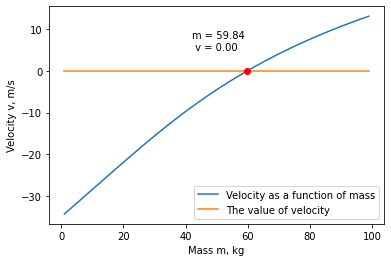

In [ ]:
vel = []
m = []
for i in range(1, 100): #computing the velocity function
  vel.append(v(i))
  m.append(i)
y = np.zeros(99) #filling an array with zeros to plot a horizontal line along the x-axis
plt.plot(m, vel) #plotting the graph
plt.plot(m, y)
plt.xlabel('Mass m, kg')
plt.ylabel('Velocity v, m/s')
line_1 = LineString(np.column_stack((m, vel)))
line_2 = LineString(np.column_stack((m, y)))
intersection = line_1.intersection(line_2)
plt.plot(*intersection.xy, 'ro') # finding the intersection of the two lines
plt.annotate('m = %.2f \n v = %.2f'%(intersection.x, intersection.y), (intersection.x, intersection.y), xytext = (42, 5))
plt.legend(['Velocity as a function of mass', 'The value of velocity'], loc = 4)
plt.show()

As we can see from the graph, the mass of around 59.84 corresponds to the velocity value of 35 m/s.

#**PART 2**

In [ ]:
def falsePosition(xl, xu, error, n):
  xr = xu
  roots = [] #creating lists for graph axes
  e = []
  num = []
  for i in range(1, n + 1):
    xrold = xr #assigning
    xr = xu - v(xu) * (xl - xu) / (v(xl) - v(xu)) #the formula of the method
    if xr != 0.0:
      e_abs = abs((xr - xrold) / xr) * 100 #error
    num.append(i) #appending elements to corresponding lists
    roots.append(xr)
    e.append(e_abs)
    if v(xl) * v(xr) > 0.0: #testing
      xu = xr
    elif v(xl) * v(xr) < 0.0:
      xl = xr
    else:
      e_abs = 0.0
    if e_abs < error:
      break
  plt.plot(num, e) #plotting the graph
  plt.xlabel = ('Number of Iterations')
  plt.ylabel = ('Error')
  plt.show()
  return i, xr, e_abs

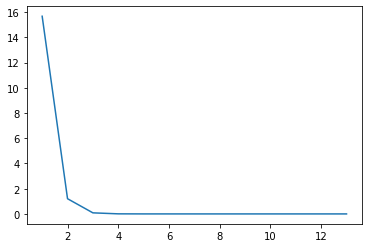

(13, 59.84104474794875, 2.9684589346363995e-13)


In [ ]:
print(falsePosition(50, 70, 1e-12, 100))

#**PART 3**

In [ ]:
m = 3
derivative(v, m, dx = 1e-16)

0.0

In [ ]:
def newton_raphson(m_init, error, n):
  xr = m_init
  roots = [] #creating lists for graph axes
  e = []
  num = []
  for i in range(1, n + 1):
    xrold = xr #assigning
    xr = xrold - v(xrold) / derivative(v, xrold, dx = 1e-6) #the formula of the method
    if xr != 0:
      e_abs = abs((xr - xrold) / xr) * 100 #error
    num.append(i) #appending elements to corresponding lists
    roots.append(xr)
    e.append(e_abs)
    if (e_abs < error):
      break
  plt.plot(num, e) #plotting the graph
  plt.xlabel = ('Number of Iterations')
  plt.ylabel = ('Error')
  plt.show()
  return i, xr, e_abs

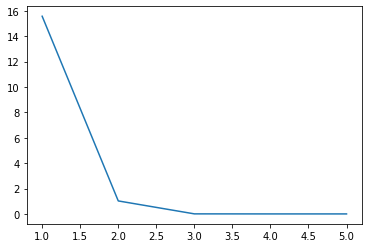

(5, 59.84104474794874, 0.0)


In [ ]:
print(newton_raphson(50, 1e-12, 100))

#**PART 4**

In [ ]:
def secant(x0, x1, error, n):
  roots = [] #creating lists for graph axes
  e = []
  num = []
  for i in range(1, n + 1):
    if v(x1) - v(x0) == 0:
      return x1
    xr = x1 - (v(x1) * (x1 - x0) * 1.0) / (v(x1) - v(x0)) #the formula of the method
    x0 = x1 #assigning
    x1 = xr
    if (xr != 0):
      e_abs = abs((xr - x0) / xr) * 100 #the error
    num.append(i) #appending elements to the corresponding lists
    roots.append(xr)
    e.append(e_abs)
    if e_abs < error:
      break
  plt.plot(num, e)
  plt.show()
  return i, xr, e_abs

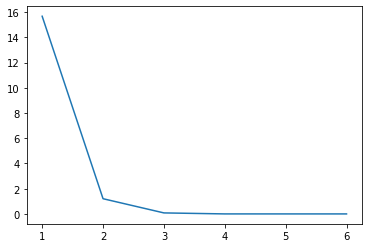

(6, 59.84104474794874, 1.662337003396384e-13)


In [ ]:
print(secant(50, 70, 1e-12, 100))

#**PART 5**

The convergence rates for the methods are as follows:

False Position - 12

Newton-Raphson - 5

Secant - 6

#**PART 6**

The maximum precision of each method is as follows:

False position - $2.97 \times 10^{-13}$

Newton-Raphson - $2.37 \times 10^{-14}$

Secant - $1.66 \times 10^{-13}$

#**PART 7**

Looking at the results, it can be said that the Newton-Ralphson method is the fastest and the most precise because it took less number of iterations and had the smallest error.

#**Conclusion**

One of the open methods, Newton-Ralphson, turned out to be the fastest. However, this is not always the case. Although open methods are quick, they are not always reliable. Vice versa, bracketing methods like False Position technique are much slower but more reliable. It was seen in this experiment - False Position method took almost twice as many iterations as the open methods. Therefore, if we need to find the roots of an equation very fastly, we can try open methods (bearing in mind that the answer may not be right) but if we need a secure answer, then we can use bracketing methods.